In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_ = pd.read_csv('data/train.csv')
test_ = pd.read_csv('data/test.csv')

train = train_.copy()
test = test_.copy()

test_id = test['id'].copy()

In [3]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [4]:
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

# fixing data set

Starting by finding relevant data. Here we check if there are some relevant information in objects and if some can be relevant. In general just checking if data should be in the model.

### Budget

<AxesSubplot:xlabel='budget', ylabel='revenue'>

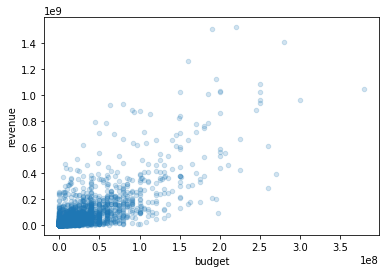

In [7]:
train.plot(kind="scatter", x="budget", y="revenue", alpha=0.2)

Here we can see that it can be considered linear, and is threrefor very relevant.

### Popularity

<AxesSubplot:xlabel='popularity', ylabel='revenue'>

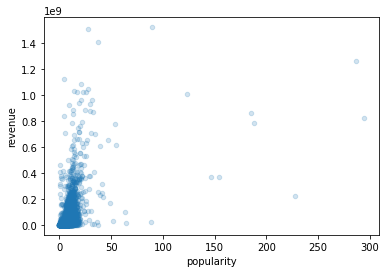

In [8]:
train.plot(kind="scatter", x="popularity", y="revenue", alpha=0.2)

Seems less relevant then "budget", but is still good for now.

### Belongs_to_collection

In [9]:
train["belongs_to_collection"].head(20)

0     [{'id': 313576, 'name': 'Hot Tub Time Machine ...
1     [{'id': 107674, 'name': 'The Princess Diaries ...
2                                                   NaN
3                                                   NaN
4                                                   NaN
5                                                   NaN
6                                                   NaN
7                                                   NaN
8     [{'id': 256377, 'name': 'The Muppet Collection...
9                                                   NaN
10    [{'id': 1575, 'name': 'Rocky Collection', 'pos...
11    [{'id': 48190, 'name': 'Revenge of the Nerds C...
12                                                  NaN
13    [{'id': 91698, 'name': 'Chili Palmer Collectio...
14                                                  NaN
15                                                  NaN
16                                                  NaN
17                                              

In [10]:
print(train["belongs_to_collection"][0])

[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]


Dont see any relevant data in the object, but we can check if having a collection is relevant.

In [11]:
train["has_collection"] = train["belongs_to_collection"].apply(lambda x: 0 if x is np.nan else 1)
test["has_collection"] = test["belongs_to_collection"].apply(lambda x: 0 if x is np.nan else 1)

<AxesSubplot:xlabel='has_collection', ylabel='revenue'>

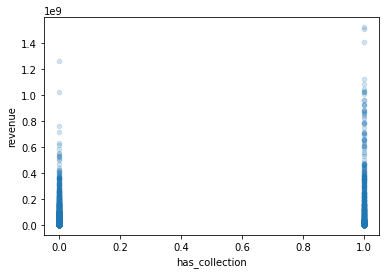

In [12]:
train.plot(kind="scatter", x="has_collection", y="revenue", alpha=0.2)

This could be relevant, considering that most that does not have a collection has a general low revenue.

### Homepage

In [13]:
train["homepage"].head(20)

0                                       NaN
1                                       NaN
2         http://sonyclassics.com/whiplash/
3                http://kahaanithefilm.com/
4                                       NaN
5                                       NaN
6        http://www.thepossessionmovie.com/
7                                       NaN
8                                       NaN
9                                       NaN
10                                      NaN
11                                      NaN
12            http://www.dreamworks.com/ab/
13                                      NaN
14                                      NaN
15    http://skinningmovie.com/synopsis.htm
16                                      NaN
17                                      NaN
18                                      NaN
19                                      NaN
Name: homepage, dtype: object

Most movies does not have a homepage, we can make a "has_homepage" column, and see of it is relevant.

In [14]:
train["has_homepage"] = train["homepage"].apply(lambda x: 0 if x is np.nan else 1)
test["has_homepage"] = test["homepage"].apply(lambda x: 0 if x is np.nan else 1)

<AxesSubplot:xlabel='has_homepage', ylabel='revenue'>

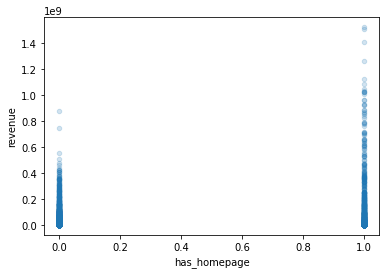

In [15]:
train.plot(kind="scatter", x="has_homepage", y="revenue", alpha=0.2)

This could be relevant, considering that most that does not have a homepage has a general low revenue.

### Original_language

In [16]:
train["original_language"].head(20)

0     en
1     en
2     en
3     hi
4     ko
5     en
6     en
7     en
8     en
9     en
10    en
11    en
12    en
13    en
14    en
15    sr
16    en
17    en
18    en
19    en
Name: original_language, dtype: object

We see here that most of the movies are in english, and that might be relevant.

In [17]:
train["is_en_original_language"] = train["original_language"].apply(lambda x: 1 if x == "en" else 0)
test["is_en_original_language"] = test["original_language"].apply(lambda x: 1 if x == "en" else 0)

<AxesSubplot:xlabel='is_en_original_language', ylabel='revenue'>

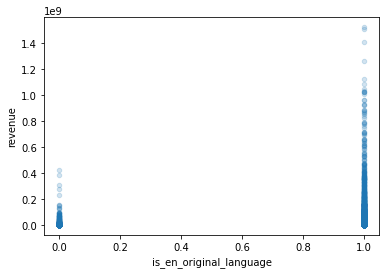

In [18]:
train.plot(kind="scatter", x="is_en_original_language", y="revenue", alpha=0.2)

Very relevant, we see here that if the movie does not have original language as english it will have a low revenue.

### Genres

In [19]:
train["genres"].head(20)

0                        [{'id': 35, 'name': 'Comedy'}]
1     [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                         [{'id': 18, 'name': 'Drama'}]
3     [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4     [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
5     [{'id': 16, 'name': 'Animation'}, {'id': 12, '...
6     [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...
7                   [{'id': 99, 'name': 'Documentary'}]
8     [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...
9     [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...
10                        [{'id': 18, 'name': 'Drama'}]
11                       [{'id': 35, 'name': 'Comedy'}]
12                        [{'id': 18, 'name': 'Drama'}]
13    [{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...
14    [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
15    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
16    [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...
17    [{'id': 18, 'name': 'Drama'}, {'id': 10749

In [20]:
print(train["genres"][3])

[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]


We see here that each genre has an ID, so we can take this ID and use that instead.

### Status

In [21]:
train["status"].head(20)

0     Released
1     Released
2     Released
3     Released
4     Released
5     Released
6     Released
7     Released
8     Released
9     Released
10    Released
11    Released
12    Released
13    Released
14    Released
15    Released
16    Released
17    Released
18    Released
19    Released
Name: status, dtype: object

In [22]:
counter = 0
for i in train["status"]:
    if (i != "Released"):
        counter = counter +1
print(counter)

4


Det er kun 4 som ikke er released, så dette vil være veldig lite relevant og er ikke verdt å ha med.

### Crew

In [23]:
train["crew"].head(20)

0     [{'credit_id': '59ac067c92514107af02c8c8', 'de...
1     [{'credit_id': '52fe43fe9251416c7502563d', 'de...
2     [{'credit_id': '54d5356ec3a3683ba0000039', 'de...
3     [{'credit_id': '52fe48779251416c9108d6eb', 'de...
4     [{'credit_id': '52fe464b9251416c75073b43', 'de...
5     [{'credit_id': '52fe46f49251416c9106558b', 'de...
6     [{'credit_id': '52fe4981c3a368484e12ee29', 'de...
7     [{'credit_id': '52fe47a69251416c750a0daf', 'de...
8     [{'credit_id': '52fe43c89251416c7501deb3', 'de...
9     [{'credit_id': '52fe45609251416c750545b3', 'de...
10    [{'credit_id': '579948e9c3a36874e9007b0b', 'de...
11    [{'credit_id': '52fe46f49251416c750891e9', 'de...
12    [{'credit_id': '52fe420ec3a36847f80007c5', 'de...
13    [{'credit_id': '52fe43cbc3a36847f807039f', 'de...
14    [{'credit_id': '52fe4223c3a36847f8006f3d', 'de...
15    [{'credit_id': '52fe4927c3a36847f818bb5f', 'de...
16    [{'credit_id': '52fe44449251416c7502eb99', 'de...
17    [{'credit_id': '53b94a260e0a2676c7009b37',

In [24]:
print(train["crew"][0])

[{'credit_id': '59ac067c92514107af02c8c8', 'department': 'Directing', 'gender': 0, 'id': 1449071, 'job': 'First Assistant Director', 'name': 'Kelly Cantley', 'profile_path': None}, {'credit_id': '52fe4ee7c3a36847f82afad7', 'department': 'Directing', 'gender': 2, 'id': 3227, 'job': 'Director', 'name': 'Steve Pink', 'profile_path': '/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg'}, {'credit_id': '5524ed25c3a3687ded000d88', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Writer', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed2d925141720c001128', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Characters', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed3d92514166c1004a5d', 'department': 'Production', 'gender': 2, 'id': 57822, 'job': 'Producer', 'name': 'Andrew Panay', 'profile_path': None}, {'credit_id': '5524ed4bc3a3687df3000dd2', 'department': 'Production', 'gender': 0, 'id': 1451

We see that we can get the amount of people in the crew, this can be relevant information.

In [25]:
train["crew_count"] = train["crew"].apply(lambda x: 0 if x is np.nan else x.count('{'))
test["crew_count"] = test["crew"].apply(lambda x: 0 if x is np.nan else x.count('{'))

<AxesSubplot:xlabel='crew_count', ylabel='revenue'>

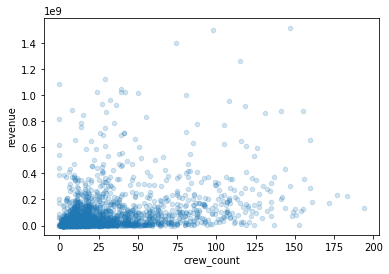

In [26]:
train.plot(kind="scatter", x="crew_count", y="revenue", alpha=0.2)

### Cast

In [27]:
train["cast"].head(20)

0     [{'cast_id': 4, 'character': 'Lou', 'credit_id...
1     [{'cast_id': 1, 'character': 'Mia Thermopolis'...
2     [{'cast_id': 5, 'character': 'Andrew Neimann',...
3     [{'cast_id': 1, 'character': 'Vidya Bagchi', '...
4     [{'cast_id': 3, 'character': 'Chun-soo', 'cred...
5     [{'cast_id': 6, 'character': 'Pinocchio (voice...
6     [{'cast_id': 23, 'character': 'Clyde', 'credit...
7     [{'cast_id': 2, 'character': 'Himself', 'credi...
8     [{'cast_id': 1, 'character': 'Long John Silver...
9     [{'cast_id': 24, 'character': 'Jonathan Steinb...
10    [{'cast_id': 16, 'character': 'Rocky Balboa', ...
11    [{'cast_id': 2, 'character': 'Lewis Skolnick',...
12    [{'cast_id': 6, 'character': 'Lester Burnham',...
13    [{'cast_id': 4, 'character': 'Chili Palmer', '...
14    [{'cast_id': 5, 'character': 'Chief John Ander...
15    [{'cast_id': 1001, 'character': 'Novica', 'cre...
16    [{'cast_id': 1, 'character': 'Lisa Reisert', '...
17    [{'cast_id': 7, 'character': 'Charles Dick

In [28]:
print(train["cast"][0])

[{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'character'

We see that we can get the amount of people in the cast, this can be relevant information.

In [29]:
train["cast_count"] = train["cast"].apply(lambda x: 0 if x is np.nan else x.count('{'))
test["cast_count"] = test["cast"].apply(lambda x: 0 if x is np.nan else x.count('{'))

<AxesSubplot:xlabel='cast_count', ylabel='revenue'>

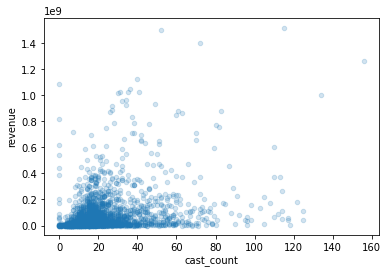

In [30]:
train.plot(kind="scatter", x="cast_count", y="revenue", alpha=0.2)

### Correlation

In [31]:
corr_matrix = train.corr()
corr_matrix["revenue"].sort_values(ascending=False)

revenue                    1.000000
budget                     0.752965
popularity                 0.461460
crew_count                 0.372110
has_collection             0.339425
cast_count                 0.335737
has_homepage               0.263179
runtime                    0.216380
is_en_original_language    0.142130
id                         0.000610
Name: revenue, dtype: float64

Here we check the correlation with revenue.

In [32]:
train_labels = train["revenue"].copy()
train = train.drop("revenue", axis=1)

df = pd.DataFrame(train)
df = df.select_dtypes(exclude=['object'])
train_num = df.drop('id', axis=1)


df_test = pd.DataFrame(test)
df_test = df_test.select_dtypes(exclude=['object'])
test_num = df_test.drop('id', axis=1)

We remove all objects from the sets that we are going to train and test our model on.

# transformatin pipeline

In [33]:
train_num_attribs = list(train_num)

In [34]:
train_num.head()

,budget,popularity,runtime,has_collection,has_homepage,is_en_original_language,crew_count,cast_count
0,14000000,6.575393,93.0,1,0,1,72,24
1,40000000,8.248895,113.0,1,0,1,9,20
2,3300000,64.299990,105.0,0,1,1,64,51
3,1200000,3.174936,122.0,0,1,0,3,7
4,0,1.148070,118.0,0,0,0,2,4


In [35]:
test_num.head()

,budget,popularity,runtime,has_collection,has_homepage,is_en_original_language,crew_count,cast_count
0,0,3.851534,90.0,1,1,0,2,7
1,88000,3.559789,65.0,0,0,1,8,10
2,0,8.085194,100.0,0,0,1,10,9
3,6800000,8.596012,130.0,0,1,0,69,23
4,2000000,3.217680,92.0,0,0,1,14,4


In [36]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy="median")

In [37]:
imputer.fit(train_num)

SimpleImputer(strategy='median')

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [39]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
num_attribs = list(train_num)
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])
train_num_tr = full_pipeline.fit_transform(train_num)
test_num_tr = full_pipeline.transform(test_num)

In [40]:
train_num_tr.shape, test_num_tr.shape

((3000, 8), (4398, 8))

# Testing and evaluating different models

In [41]:
X = train_num_tr
y = train_labels
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=2)

In [42]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [43]:
#from sklearn.linear_model import SGDClassifier
#SGD = SGDClassifier(loss="hinge", penalty="l2", max_iter=100)
#SGD.fit(X, y)

In [44]:
#from sklearn.linear_model import LogisticRegression 
#log_reg = LogisticRegression(max_iter=500)
#log_reg.fit(X, y)

In [45]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=69)
forest_reg.fit(X, y)

RandomForestRegressor(random_state=69)

### Trying out voting classifier 
combining Random Forest, Logistic regression and SVC.

In [46]:
#from sklearn.ensemble import RandomForestClassifier 
#from sklearn.ensemble import VotingClassifier
#from sklearn.svm import SVC
#log_clf = LogisticRegression(max_iter=500)
#rnd_clf = RandomForestClassifier()
#svm_clf = SVC()
#voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],voting='hard')
#voting_clf.fit(X, y)

#### compairing mean squared error

In [47]:
#log_reg_predictions = log_reg.predict(X)
#log_reg_mse = mean_squared_error(y, log_reg_predictions)
#log_reg_rmse = np.sqrt(log_reg_mse)
#log_reg_rmse

In [48]:
from sklearn.metrics import mean_squared_error
knn_predictions = neigh.predict(X)
knn_mse = mean_squared_error(y, knn_predictions)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

77915319.61989523

In [49]:
lin_predictions = lin_reg.predict(X)
lin_mse = mean_squared_error(y, lin_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

81714550.40932438

In [50]:
#SGD_predictions = SGD.predict(X)
#SGD_mse = mean_squared_error(y, SGD_predictions)
#SGD_rmse = np.sqrt(SGD_mse)
#SGD_rmse

In [51]:
forest_reg_predictions = forest_reg.predict(X)
forest_mse = mean_squared_error(y, forest_reg_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

29937558.442706272

In [52]:
#voting_clf_prediction = voting_clf.predict(X)
#voting_mse = mean_squared_error(y, voting_clf_prediction)
#voting_rmse = np.sqrt(voting_mse)
#voting_rmse

## Evaluation
evaluetes the two best models.

In [53]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [54]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X, y, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [70648183.49038617 74380461.368907   91768441.18777579 76391311.6967382
 80819335.74651124 95080001.14454347 64342680.45860594 78935487.77117196
 81565139.73401804 72947718.87733191]
Mean: 78687876.14759898
Standard deviation: 8831108.391291562


In [55]:
lin_scores = cross_val_score(lin_reg, X, y, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [83131745.81131513 83969224.99861056 92108315.6305389  81078766.06616671
 74558811.44588162 95426190.33060543 68036974.38780619 79229967.38304248
 85451646.30219224 78970964.50319663]
Mean: 82196260.68593559
Standard deviation: 7531017.109456678


# Fine tuning the best model

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=6),
        'n_jobs': [-1]
    }

forest_reg = RandomForestRegressor(random_state=69)

rnd_search = RandomizedSearchCV(
                forest_reg, 
                param_distributions=param_distribs,
                n_iter=10, 
                cv=5, 
                scoring='neg_mean_squared_error', 
                random_state=69
            )

rnd_search.fit(X, y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=69),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x129b31880>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x129b56af0>,
                                        'n_jobs': [-1]},
                   random_state=69, scoring='neg_mean_squared_error')

In [57]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

77527311.69483666 {'max_features': 4, 'n_estimators': 108, 'n_jobs': -1}
76823595.34678066 {'max_features': 3, 'n_estimators': 184, 'n_jobs': -1}
78804392.75565872 {'max_features': 5, 'n_estimators': 50, 'n_jobs': -1}
77184792.43499216 {'max_features': 2, 'n_estimators': 185, 'n_jobs': -1}
77748480.29281865 {'max_features': 2, 'n_estimators': 39, 'n_jobs': -1}
77427923.27716467 {'max_features': 1, 'n_estimators': 89, 'n_jobs': -1}
77692015.01255192 {'max_features': 5, 'n_estimators': 166, 'n_jobs': -1}
77009587.28465232 {'max_features': 3, 'n_estimators': 76, 'n_jobs': -1}
77819637.13144758 {'max_features': 4, 'n_estimators': 81, 'n_jobs': -1}
89619167.58958408 {'max_features': 1, 'n_estimators': 3, 'n_jobs': -1}


In [58]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([0.42961806, 0.23316659, 0.08876377, 0.05725804, 0.02107502,
       0.00306793, 0.08298124, 0.08406935])

In [59]:
sorted(zip(feature_importances, num_attribs), reverse=True)

[(0.4296180629936235, 'budget'),
 (0.2331665905449352, 'popularity'),
 (0.08876377173036859, 'runtime'),
 (0.08406935496024173, 'cast_count'),
 (0.0829812374407766, 'crew_count'),
 (0.057258036845148144, 'has_collection'),
 (0.02107501935094536, 'has_homepage'),
 (0.0030679261339608774, 'is_en_original_language')]

In [60]:
rnd_search.best_params_

{'max_features': 3, 'n_estimators': 184, 'n_jobs': -1}

# Final model

In [61]:
final_model = rnd_search.best_estimator_
final_predictions_S =  final_model.predict(test_num_tr)

In [62]:
len(final_predictions_S)

4398

In [63]:
submission = pd.DataFrame({
    'id': test_id,
    'revenue': final_predictions_S
})

In [64]:
submission.head()

,id,revenue
0,3001,1.622791e+07
1,3002,4.200086e+06
2,3003,1.463839e+07
3,3004,5.755061e+07
4,3005,3.989319e+06


In [65]:
submission.to_csv('submission.csv', index=False)

On our first submission, we tried out alot of models. We tried out KNN, stochastic gradient decent, logastic regression, linear regression, random forest regressor. We tried to just remove all objects to only have floats left. We found out that budget was a really good attribute and used that primarily. With only the float coloubs left, random forest regressor was the best model. On this submission we got 2.66307.

On our second submission, we added has_collection and has_homepage, in addition to a randomstate to the random forest regressor. We got 2.63794

On our third submission, we removed oneHotEncoder, and fixed our pipelining. We got a score of 2.60296.

On our fourth submission, we added is_en_original_language. We got a score of 2.61122.